### Import

In [154]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn import preprocessing

### Fonts

In [185]:
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'Helvetica'}

### Get Data

In [186]:
columns = pd.read_csv('../../data/iris/iris.names',header=None)
data = pd.read_csv('../../data/iris/iris.data',header=None,delimiter=',')

### Convert the labels

In [190]:
text_labels = data[4].values
label_enc = preprocessing.LabelEncoder();
label_enc.fit(text_labels);
y = label_enc.transform(text_labels)
X = data.values
X = X[:,:-1].astype('float')

### Colors for classes

In [191]:
colors = np.zeros((3,3))
colors[0,:] = [1.0,0.7,0.3]
colors[1,:] = [0.2,0.5,0.5]
colors[2,:] = [0.6,0.3,0.8]

### Plot

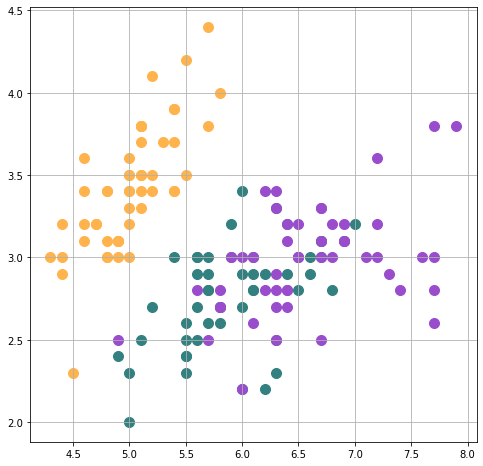

In [192]:
plt.figure(figsize=(8,8))
no_classes = np.unique(y)
for label in no_classes:
    indices = np.where(label == y)[0]
    plt.scatter(X[indices,0],X[indices,1],color=colors[label,:],
                s=100,label=label_enc.classes_[0])
plt.grid();
# plt.axis((-3,3,-2,2));

### Subset

In [193]:
X = X[:100,:]
y = y[:100]
# X = np.hstack((X,X))[:,:5]
# X[:,-1] = 1
randval = np.random.permutation(100)
X = X[randval,:2]
y = y[randval]
X[:,0] = X[:,0] - np.mean(X[:,0])
X[:,1] = X[:,1] - np.mean(X[:,1])
# X[:,2] = X[:,2] - np.mean(X[:,2])

### Plot Again

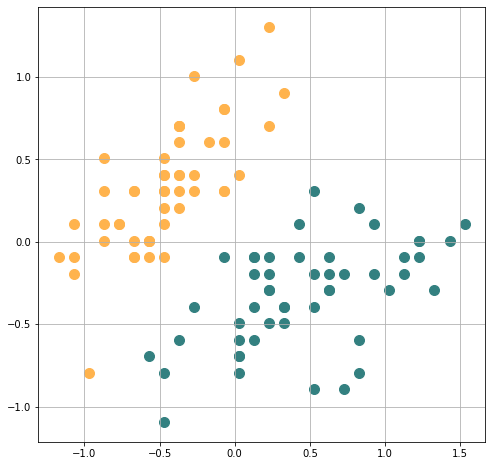

In [194]:
plt.figure(figsize=(8,8))
no_classes = np.unique(y)
for label in no_classes:
    indices = np.where(label == y)[0]
    plt.scatter(X[indices,0],X[indices,1],color=colors[label,:],
                s=100,label=label_enc.classes_[0])
plt.grid();
# plt.axis((-3,3,-2,2));

### Init weights

In [206]:
no_epochs = 10
learning_rate = 0.0001
w = (np.random.random((2,1)) - 0.5) * 0.001
npoints = X.shape[0]

### Learning Algorithm

In [207]:
history = []
print(npoints)
for n in range(no_epochs):
    
    error = 0
    loss = 0
    for i in range(npoints):

        #Compute Activation for this point
        x = X[i,:]
        activation = x[0] * w[0] + x[1] * w[1] #+ x[2] * w[2] + x[3] * w[3] + x[4] * w[4]

        #Compute prediction and error
        prediction = (activation > 0)*1.0
        desired = y[i]
        error = desired - prediction
        loss = loss + error**2
        
#     error = error / npoints
#     loss = error**2
#     print(loss)

        #Update weights
        w[0] = w[0] + (x[0]*error * learning_rate)
        w[1] = w[1] + (x[1]*error * learning_rate)
#     w[2] = w[2] - (x[2]*error * learning_rate)
#     w[3] = w[3] - (x[3]*error * learning_rate)
#     w[4] = w[4] - (x[4]*error * learning_rate)
        #print(w)
    print(loss)
    #Compute Accuracy
    ypred = (np.dot(X,w) > 0)*1.0
    accuracy = np.sum(ypred[:,0] == y) / len(y)
    history.append(accuracy)
    print(accuracy)
print(w)

100
[11.]
1.0
[0.]
1.0
[0.]
1.0
[0.]
1.0
[0.]
1.0
[0.]
1.0
[0.]
1.0
[0.]
1.0
[0.]
1.0
[0.]
1.0
[[ 0.00036453]
 [-0.00037286]]


### Plot Accuracy over each epoch

[[ 0.01694367]
 [-0.1622664 ]
 [ 0.3860415 ]
 [ 0.31724462]
 [-0.38017509]]


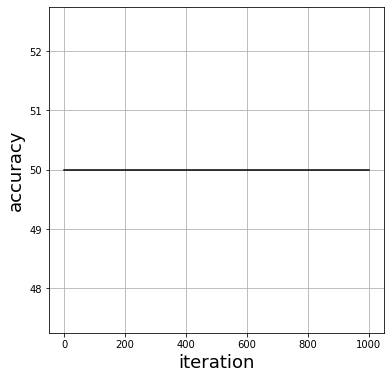

In [50]:
plt.figure(figsize=(6,6))
plt.plot(history,'k');
plt.xlabel('iteration',fontsize=18);
plt.ylabel('accuracy',fontsize=18);
plt.grid()
print(w)

### Final Accuracy

In [ ]:
ypred = (np.dot(X,w) > 0) * 1.0;
accuracy = np.sum(ypred == y) / len(ypred);
print(accuracy);

### Accuracy Landscape

In [ ]:
field = np.zeros((101,101))
val = np.linspace(-2,2,101)
for i in range(len(val)):
    for j in range(len(val)):
        w = np.array([val[i],val[j]])
        w = np.expand_dims(w,-1)
        ypred = (np.dot(X,w) > 0) * 1.0;
        accuracy = np.sum(ypred == y) / len(ypred);
        field[i,j] = accuracy
plt.imshow(field,extent=(-2,2,-2,2));
plt.colorbar();

In [ ]:
plt.figure(figsize=(6,6));
plt.scatter(x,y,c='k',s=100,zorder=1010);
plt.plot([x0,x1],[y0,y1],'k',zorder=100);
plt.plot([x0,x1],[y_mean,y_mean],'k:',zorder=100);
for idx in range(len(x)):
    plt.plot([x[idx],x[idx]],[y[idx],y_pred[idx]],'r--') #SS Error
    plt.plot([x[idx],x[idx]],[y_pred[idx],y_mean],'g--') #SS Regression
    plt.scatter(x[idx],y_pred[idx],s=25,color='k',zorder=1000)
    plt.scatter(x[idx],y_pred[idx],s=25,color='k',zorder=1000)
    plt.scatter(x[idx],y_mean,s=25,color='k',zorder=1000)
plt.grid();
plt.xlabel('age',fontsize=22,**csfont);
plt.ylabel('medical expenses (dollars x 1000)',fontsize=22,**csfont);
plt.xticks(fontsize=14,**csfont);
plt.yticks(fontsize=14,**csfont);
plt.text(75,12,"SST = " + str(np.round(SST,2)),fontsize=22,**csfont);
plt.text(75,10,"SSR = " + str(np.round(SSR,2)),fontsize=22,**csfont);
plt.text(75,8,"SSE = " + str(np.round(SSE,2)),fontsize=22,**csfont);
plt.text(75,6,"r-squared = " + str(np.round(rsquared,2)),fontsize=22,**csfont);
plt.text(75,4,"a = " + str(np.round(a,2)),fontsize=22,**csfont);
plt.text(75,2,"b = " + str(np.round(b,2)),fontsize=22,**csfont);
plt.plot([45,50],[2.25,2.25],'r--')
plt.plot([45,50],[3.25,3.25],'g--')
plt.text(51.5,3.05,"= SSE",color='k',fontsize=18,**csfont);
plt.text(51.5,2.05,"= SSR",color='k',fontsize=18,**csfont);
plt.axis((10,70,0,15));
plt.savefig('../../assets/figures/014/ols_approach_medical_expenses.png', dpi=300,bbox_inches="tight")